In [0]:
# Copyright (c) 2017 Max deGroot, Ellis Brown
# Released under the MIT license
# https://github.com/amdegroot/ssd.pytorch
# Updated by: Takuya Mouri

In [0]:
## バージョンを指定する場合、セルをコメントアウトしてください。
#!pip install torch==0.4.1
#!pip install torchvision==0.2.1
#!pip install numpy==1.14.6
#!pip install matplotlib==2.1.2
#!pip install Pillow==5.0.0

In [1]:
# version確認
import torch
print(torch.__version__)

1.1.0


In [0]:
# GPUの接続
import torch
torch.cuda.is_available()

True

# Google Driveへのマウント（Colab利用時のみ）

In [0]:
# Google Driveにマウント
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%%bash
mkdir -p /content/git
cd /content/git
# git clone https://github.com/miyamotok0105/pytorch_handbook.git
# git clone https://github.com/Yo-Watabe/pytorch.git
git clone -b max_iter_30 https://github.com/Yo-Watabe/pytorch.git max_iter_30
git clone https://github.com/Shenggan/BCCD_Dataset.git
wget https://s3.amazonaws.com/amdegroot-models/vgg16_reducedfc.pth

In [3]:
# フォルダ移動
# cd /content/gdrive/My Drive/Colab Notebooks/pytorch_handbook/chapter7
#  cd /content/git/pytorch/chapter7
cd /content/git/max_iter_30/chapter7

/content/git/max_iter_30/chapter7


In [6]:
%%bash
mkdir VOCdevkit
cp -r /content/git/BCCD_Dataset/BCCD VOCdevkit/BCCD
cp /content/git/vgg16_reducedfc.pth weights 

mkdir: cannot create directory ‘VOCdevkit’: File exists


In [7]:
%%bash
ls VOCdevkit
ls weights

BCCD
vgg16_reducedfc.pth
weightsのファイル取得先.txt


In [8]:
# ファイル名を表示
!pwd
!ls
# !cat data/config.py

/content/git/max_iter_30/chapter7
data  inference.py  section7_4.ipynb  utils	 weights
demo  layers	    ssd.py	      VOCdevkit


# ベースネットVGG-16のパラメータをダウンロード（フォルダweights未格納時）

In [0]:
# ベースネットワークのパラメータファイルをダウンロード
!wget https://s3.amazonaws.com/amdegroot-models/vgg16_reducedfc.pth

--2019-04-05 13:22:28--  https://s3.amazonaws.com/amdegroot-models/vgg16_reducedfc.pth
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.104.109
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.104.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81938914 (78M) [binary/octet-stream]
Saving to: ‘vgg16_reducedfc.pth.2’

vgg16_reducedfc.pth 100%[===================>]  78.14M  23.1MB/s    in 3.7s    

2019-04-05 13:22:33 (21.1 MB/s) - ‘vgg16_reducedfc.pth.2’ saved [81938914/81938914]



In [0]:
import os
# フォルダweights未作成の場合に作成
if not os.path.exists('weights/'):
    os.mkdir('weights/')

In [0]:
# パラメータファイルをフォルダweightsに移動
!mv vgg16_reducedfc.pth weights

# データセットVOC2007(0.9GB)のダウンロード（フォルダVOCdevkit未格納時）

In [0]:
# データセットVOC2007をダウンロード 
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!tar xf VOCtrainval_06-Nov-2007.tar

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

--2019-03-30 13:45:05--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  43.8MB/s    in 9.9s    

2019-03-30 13:45:15 (44.1 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]

--2019-03-30 13:46:44--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/x-tar]
Saving to: ‘VOCtest_06-Nov-2007.tar’

VOCtest_06-Nov-2007 100%[===================

# データセットVOC2012(1.9GB)のダウンロード（フォルダVOCdevkit未格納時）

In [0]:
# データセットVOC2012をダウンロード 
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_11-May-2012.tar

--2019-04-05 16:21:27--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  42.8MB/s    in 45s     

2019-04-05 16:22:12 (42.4 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



# SSDネットワークの学習

In [0]:
# ファイル名を表示
!ls

data	     section7_4.ipynb	    utils
demo	     section7_4_v0.4.ipynb  VOCdevkit
layers	     section7_4_v1.0.ipynb  VOCtrainval_11-May-2012.tar
__pycache__  ssd.py		    weights


In [0]:
from data import *
from utils.augmentations import SSDAugmentation
from layers.modules import MultiBoxLoss
from ssd import build_ssd
import os
import sys
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
import torch.nn.init as init
import torch.utils.data as data
import numpy as np
import argparse

In [0]:
# 学習の再開時はargs['resume']にパラメータファイルを指定
args = {'dataset':'BCCD',  # VOC → BCCD
        'basenet':'vgg16_reducedfc.pth',
        'batch_size':12,
        'resume':'',
        'start_iter':0,
        'num_workers':4,
        'cuda':True,
        'lr':5e-4,
        'momentum':0.9,
        'weight_decay':5e-4,
        'gamma':0.1,
        'save_folder':'weights/'
       }

In [0]:
# Tensor作成時のデフォルトにGPU Tensorを設定
if torch.cuda.is_available():
    if args['cuda']:
        torch.set_default_tensor_type('torch.cuda.FloatTensor')
    if not args['cuda']:
        print("WARNING: It looks like you have a CUDA device, but aren't " +
              "using CUDA.\nRun with --cuda for optimal training speed.")
        torch.set_default_tensor_type('torch.FloatTensor')
else:
    torch.set_default_tensor_type('torch.FloatTensor')

In [12]:
# リロード __init__
import importlib
importlib.reload(__import__('data'))
from data import *
print(voc['max_iter'])

30


In [0]:
# 訓練データの設定
cfg = voc
dataset = VOCDetection(root=VOC_ROOT,
                       transform=SSDAugmentation(cfg['min_dim'],
                                                 MEANS))

In [0]:
# ネットワークの定義
ssd_net = build_ssd('train', cfg['min_dim'], cfg['num_classes'])
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# ネットワークをGPUに転送
net = ssd_net.to(device)

In [15]:
# 学習の再開時はargs['resume']のパラメータをロード
if args['resume']:
    print('Resuming training, loading {}...'.format(args['resume']))
    ssd_net.load_weights(args['save_folder'] + args['resume'])
# 学習の開始時はargs['basenet']のパラメータをロード    
else:
    vgg_weights = torch.load(args['save_folder'] + args['basenet'])
    print('Loading base network...')
    ssd_net.vgg.load_state_dict(vgg_weights)

Loading base network...


In [0]:
# ネットワークのモジュールリストを出力
print(net)

In [0]:
if args['cuda']:
    net = torch.nn.DataParallel(ssd_net)
    cudnn.benchmark = True

In [0]:
def adjust_learning_rate(optimizer, gamma, step):
    """Sets the learning rate to the initial LR decayed by 10 at every
        specified step
    # Adapted from PyTorch Imagenet example:
    # https://github.com/pytorch/examples/blob/master/imagenet/main.py
    """
    lr = args['lr'] * (gamma ** (step))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


def xavier(param):
    init.xavier_uniform_(param)


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        xavier(m.weight.data)
        m.bias.data.zero_()

In [19]:
# 新規モデル学習時は追加ネットワークの畳み込み、位置推定、クラス分類の畳み込みパラメータを初期化する
if not args['resume']:
    print('Initializing weights...')
    # initialize newly added layers' weights with xavier method
    ssd_net.extras.apply(weights_init)
    ssd_net.loc.apply(weights_init)
    ssd_net.conf.apply(weights_init)

Initializing weights...


In [0]:
# 損失関数の設定
criterion = MultiBoxLoss(cfg['num_classes'], 0.5, True, 0, True, 3, 0.5,
                         False, args['cuda'])

In [0]:
# 最適化パラメータの設定
optimizer = optim.SGD(net.parameters(), lr=args['lr'], momentum=args['momentum'],
                      weight_decay=args['weight_decay'])

In [22]:
# 訓練モード
net.train()
# loss counters
loc_loss = 0
conf_loss = 0
epoch = 0
print('Loading the dataset...')

epoch_size = len(dataset) // args['batch_size']
print('dataset_size', len(dataset))
print('epoch_size', epoch_size)
print('Training SSD on:', dataset.name)
print('Using the specified args:')
print(args)

step_index = 0

Loading the dataset...
dataset_size 292
epoch_size 24
Training SSD on: VOC0712
Using the specified args:
{'dataset': 'BCCD', 'basenet': 'vgg16_reducedfc.pth', 'batch_size': 12, 'resume': '', 'start_iter': 0, 'num_workers': 4, 'cuda': True, 'lr': 0.0005, 'momentum': 0.9, 'weight_decay': 0.0005, 'gamma': 0.1, 'save_folder': 'weights/'}


In [0]:
# 訓練データのデータローダへの設定
data_loader = data.DataLoader(dataset, args['batch_size'],
                              num_workers=args['num_workers'],
                              shuffle=True, collate_fn=detection_collate,
                              pin_memory=True)

In [24]:
# 学習の開始
batch_iterator = None
# iterationでループして、cfg['max_iter']まで学習する
for iteration in range(args['start_iter'], cfg['max_iter']):
    # 学習開始時または1epoch終了後にdata_loaderから訓練データをロードする
    if (not batch_iterator) or (iteration % epoch_size ==0):
        batch_iterator = iter(data_loader)
        loc_loss = 0
        conf_loss = 0
        epoch += 1

    if iteration in cfg['lr_steps']:
        step_index += 1
        adjust_learning_rate(optimizer, args['gamma'], step_index)
        
    # load train data
    # バッチサイズ分の訓練データをload
    images, targets = next(batch_iterator)
    
    # 画像をGPUに転送
    images = images.to(device)
    # アノテーションをGPUに転送    
    targets = [ann.to(device) for ann in targets]

    # forward
    t0 = time.time()
    # 順伝播の計算
    out = net(images)
    # 勾配の初期化
    optimizer.zero_grad()
    # 損失関数の計算
    loss_l, loss_c = criterion(out, targets)
    loss = loss_l + loss_c
    # 勾配の計算
    loss.backward()
    # パラメータの更新
    optimizer.step()
    t1 = time.time()
    # 損失関数の更新
    loc_loss += loss_l.item()
    conf_loss += loss_c.item()
    
    #ログの出力
    if iteration % 10 == 0:
        print('timer: %.4f sec.' % (t1 - t0))
        print('iter ' + repr(iteration) + ' || Loss: %.4f ||' % (loss.item()), end=' ')

# 学習済みモデルの保存
torch.save(ssd_net.state_dict(),
           args['save_folder'] + '' + args['dataset'] + '.pth')

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


timer: 9.4230 sec.
iter 0 || Loss: 24.8076 || timer: 0.1886 sec.
iter 10 || Loss: 14.1553 || timer: 0.1658 sec.
iter 20 || Loss: 12.4811 || 

Loading weights into state dict...
Finished!


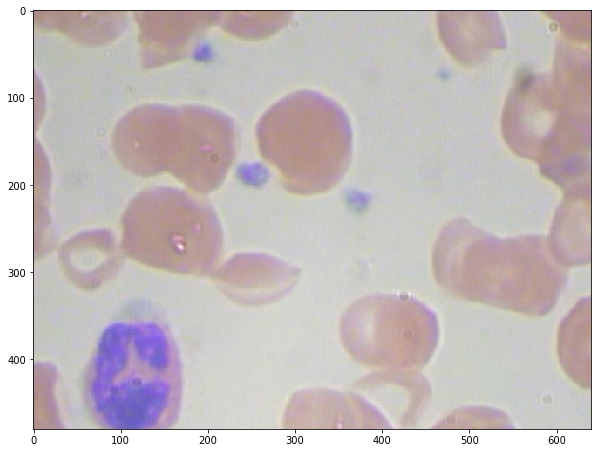

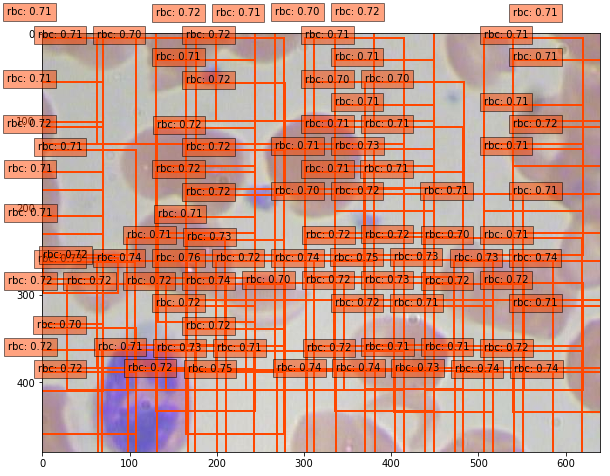

In [26]:
%run -i inference.py